# Problema 8.190 livro Fox et al. 8.ed questão 8.190

In [47]:
import math
from IPython.display import Image
import numpy as np
from scipy import optimize
import pandas as pd

### Parâmetros de entrada:
    - E: 5.416e-05 # [m] -> Rugosidade da parede interna do duto
    - Q: 1.9e-3  # [m³/s] -> Vazão no sistema
    - pi: 3.141592653589793 -> Pi
    - Dim: 20.93e-3 # [m] -> Diâmetro interno do duto
    - A: pi * (Din / 2) ** 2 # [m²] -> Área da secção do tubo
    - rho: 998 # [kg/m3] -> Densidade do fluido (água)
    - mu: 0.001 # [Pa.s] -> Viscosidade do fluido (água
    - A: 0.000344055 # [m²] -> Área da secção do tubo
    - Re: 115351.97442 # [ ] -> n.º de reynolds para o escoamento
    - f0: 0.009 # chute do método de newton
    - Lc: 30 * Din # [m] -> Comprimento de duto relativo ao cotovelo
    - Lt: 20 * Din # [m] -> Comprimento de duto relativo ao tronco
    - Lsec1: 3  # [m] -> Comprimento da secção 1 do duto
    - Lsec2: 12.2  # [m] -> Comprimento da secção 2 do duto
    - Lsec3: 6.1  # [m] -> Comprimento da secção 3 do duto



Segue os passos para resolver o problema da questão a seguir:

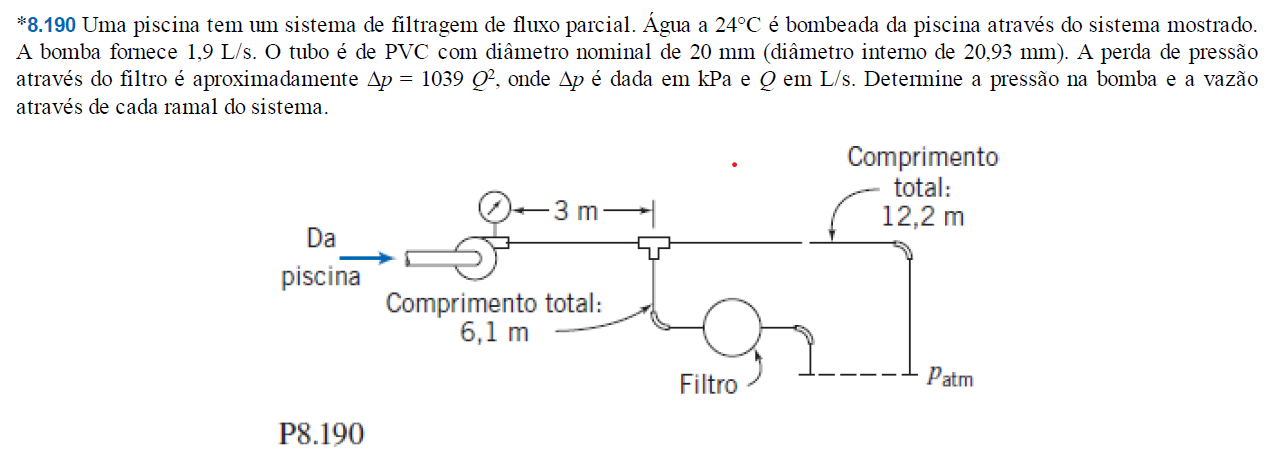

In [48]:
Image(filename='questão.png')

O problema consiste em uma malha de tubulação ramificada onde é encontrado uma bomba de água que alimenta um sistema ramificado de tubulação com filtragem parcial, as incognitas são:
    - Potência da bomba de
    - Vazão em cada ramificação do sistema.

O sistema pode ser dividido em três blocos de tubulação:
    - Tubulação de entrada. (Secção 1)
    - Tubulação de saída. (Secção 2)
    - Tubulação de filtragem parcial. (Secção 3)

### Secção 1: Tubulação de entrada
Há três elementos na secção 1:
    - Bomba da piscina. (A ser dimensionado)
    - 3 m de tubulação. (Lsec1 nos cálculos)
    - Tronco de ramificação.

* A bomba da piscina é o total da perda de carga geral da malha, logo, é o último passo do cálculo.

* Tubulação é a referência de perda de carga, logo, tudo vai ser convertido para comprimento de tubulação
    - 3 [m]. (Lsec1 nos cálculos)
    - Tronco de ramificação: 20 * Diâmetro do tubo [m].

A ideia é que o problema seja resolvido utilizando o método de Newton-Raphson.
   - Nº de Reynolds para a secção 1: Re = 115.351,9744 (escoamento turbulento)

   - Equação de colebroke 1 / √f = 2 * ln( 3.7 * (E/D) + 2.51 / (Re * √f))

   - Substituindo os valores e utilizando o método de Newton-Raphson:
        f = 0.026367887783683545

   - (perda de carga) = f * (L / D) * (Vmed ^2) / 2

   - (variação de pressão) = (perda de carga) * (rho_água)

   - Segue as modelagens dos cálculos para a secção 1:


In [5]:
E = 5.416e-05  # [m] -> Rugosidade da parede interna do duto

Q = 1.9e-3  # [m³/s] -> Vazão no sistema

pi = math.pi

Din = 20.93e-3 # [m] -> Diâmetro interno do duto

A = pi * (Din / 2) ** 2 # [m²] -> Área da secção do tubo

rho = 998 # [kg/m3] -> Densidade do fluido (água)

mu = 1e-3 # [Pa/s] -> Viscosidade dinâmica do fluido (agua)

v = Q / A # [m/s] -> Velocidade do escoamento

Re = rho * Din * v / mu # [] -> n.º de reynolds para o fluido em questão

f0 = 0.009

Lc = 30 * Din
Lt = 20 * Din
Lsec1 = 3  # [m] -> Comprimento da secção 1 do duto
Lsec2 = 12.2  # [m] -> Comprimento da secção 2 do duto
Lsec3 = 6.1  # [m] -> Comprimento da secção 3 do duto

In [30]:
# velocidade de ecoamento:
data_df1 = pd.DataFrame({'velocidade média (m/s)': [v], 'Diâmetro do tubo (m)': [Din],'Viscosidade Dinâmica (Pa/s)': [mu],'Densidade esp água (kg/m³)':[rho] , 'Reynolds': [Re]})
data_df1

,velocidade média (m/s),Diâmetro do tubo (m),Viscosidade Dinâmica (Pa/s),Densidade esp água (kg/m³),Reynolds
0,5.522367,0.02093,0.001,998,115351.974426


##### Equação de Colebroke e cálculo do fator de atrito:

In [40]:
def colebroke(f):
    return 1 / (f ** 0.5) + 2.0 * np.log10(E / (3.7 * Din) + 2.51 / (Re * f ** 0.5))
def colebroke_derivada(f):
    return -0.5 * f ** (-1.5) - 2.51 * f ** (-1.5) / (Re * (2.51 * f ** (-0.5) / Re + 0.27027027027027 * E / Din) * np.log(10))

##### fator de atrito por método de Newton-Raphson:
* perda de carga e variação de pressão:

In [44]:
fator_de_atrito, results = optimize.newton(colebroke, f0, colebroke_derivada, full_output=True)

In [45]:
f = fator_de_atrito
hl12 = f * (Lsec1 + Lt) / Din * (v ** 2 / 2)
dp12 = hl12 * rho

In [46]:
data_df2 = pd.DataFrame({'Fator de Atrito':[f],'Perda de Carga (N)': [hl12], 'Diferença de Pressão (Pa)': [dp12]})
data_df2

,Fator de Atrito,Perda de Carga (N),Diferença de Pressão (Pa)
0,0.026368,65.671197,65539.854537


### Secção 2: Tubulação de saída
Há dois elementos na secção 1:
    - 12.2 [m] de tubulação. (Lsec2 nos cálculos)
    - cotovelo. (30 * diâmetro da tubulação)

Comprimento efetivo da tubulação será de: 12,8279 m

In [50]:
Ltotal2 = Lsec2 + Lc
Ltotal2

12.8279

### Secção 3: Tubulação de filtragem parcial
Há três elementos na secção 1:
    - 6.1 [m] de tubulação. (Lsec3 nos cálculos)
    - Tronco de ramificação.
    - Tubulação de filtragem parcial.

1. A questão é a ausência de valores sobre a vazão nas secções e a perda de carga gerada pelo filtro, mas sabe-se que a variação de pressão gerada pelo filtro é de 1039 * (vazão da secção 3) ^2
2. A vazão na secção 2 depende da vazão na secção 3.
3. A soma das vazões na secção 2 e 3 é a vazão na secção 1. (1,9 L/s)
4. A perda de pressão nas secções 2 e 3 são iguais

Portanto, a solução é uma equação de colebroke composta por ambas as secções, relacionando vazão com a variação de pressão.
Uma simplificação será calcular as perdas de cargas sem o filtro, para que seja possível calcular o fator de atrito na secção 3.

(daqui para baixo eu tenho que consertar a equação de colebroke para o novo problema envolvendo as duas secções)

ValueError: could not convert string to float: ''

In [ ]:
def colebroke_filtro(x):
    return 1 / ((1039 * pi * (Din ** 3) / (rho * x * 2)) ** 0.5) + 2.0 * np.log10(E / (3.7 * Din) + 2.51 / (Re * (1039 * pi * (Din ** 3) / (rho * x * 2)) ** 0.5))

In [ ]:
def colebroke_filtro_derivada(x):
    return -0.5 * (1039 * pi * (Din ** 3) / (rho * x * 2)) ** (-1.5) - 2.51 * (1039 * pi * (Din ** 3) / (rho * x * 2)) ** (-1.5) / (
                Re * (2.51 * (1039 * pi * (Din ** 3) / (rho * x * 2)) ** (-0.5) / Re + 0.27027027027027 * E / Din) * np.log(10))

In [68]:

function2, results2 = optimize.newton(colebroke_filtro, f0, colebroke_filtro_derivada, full_output=True)

RuntimeError: Failed to converge after 50 iterations, value is 0.052265310042179554.